In [1]:
import cv2
import matplotlib.pyplot as plt
# import numpy as np
from sklearn.cluster import KMeans

# 展示图片

In [2]:
img_dir = '../output_video'

In [3]:
image_path = img_dir + '/player_1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [1]:
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

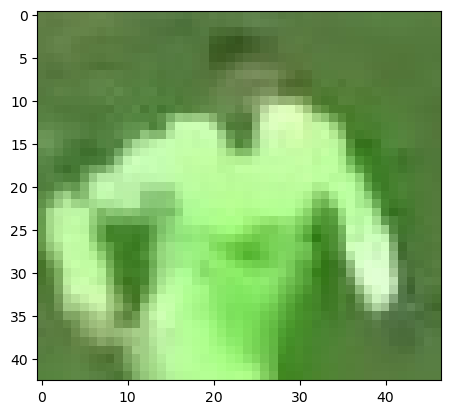

In [5]:
# 选取上半区域
top_half = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half)
plt.show()

# 颜色聚类

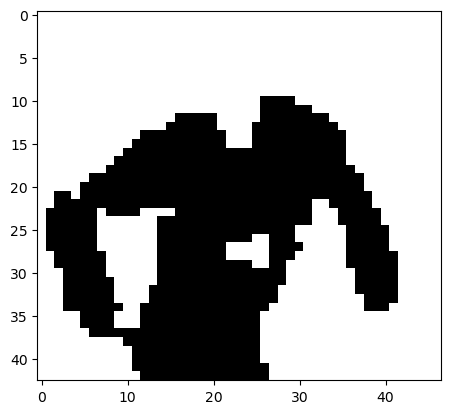

In [9]:
# 重塑为2D数组
image_2d = top_half.reshape(-1, 3)
# 使用KMeans聚类
kmeans = KMeans(n_clusters=2,  random_state=0)
kmeans.fit(image_2d)
# 获取聚类结果
labels = kmeans.labels_
# 重塑为图像
segmented_image = labels.reshape(top_half.shape[0], top_half.shape[1])
plt.imshow(segmented_image, cmap='gray')
plt.show()

In [10]:
# 一般来说角落是背景，中间是前景
corner_cluster = [segmented_image[0, 0], segmented_image[0, -1], segmented_image[-1, 0], segmented_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print('Non player cluster:', non_player_cluster)

Non player cluster: 1


In [12]:
player_cluster = 1-non_player_cluster
print('Player cluster:', player_cluster)

Player cluster: 0


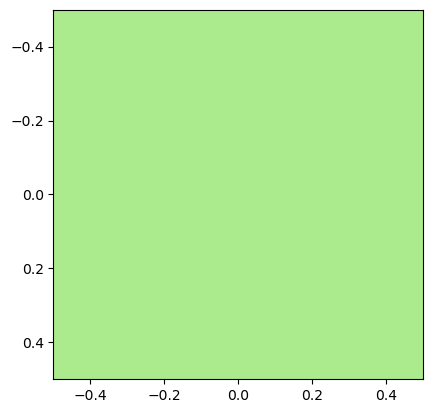

In [19]:
kmeans.cluster_centers_[player_cluster]
# 展示聚类中心代表的颜色，要整数化
color = kmeans.cluster_centers_[player_cluster].astype(int)
plt.imshow([[color]])